In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Problem 1

In [2]:
from sklearn.datasets import fetch_openml
cifar_10_small = fetch_openml('CIFAR_10_Small', version=1)

In [3]:
cifar_10_small.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = cifar_10_small['data'], cifar_10_small['target']

In [5]:
print('shape X: {}, one example shape: {}'.format(X.shape, X[0].shape))

shape X: (20000, 3072), one example shape: (3072,)


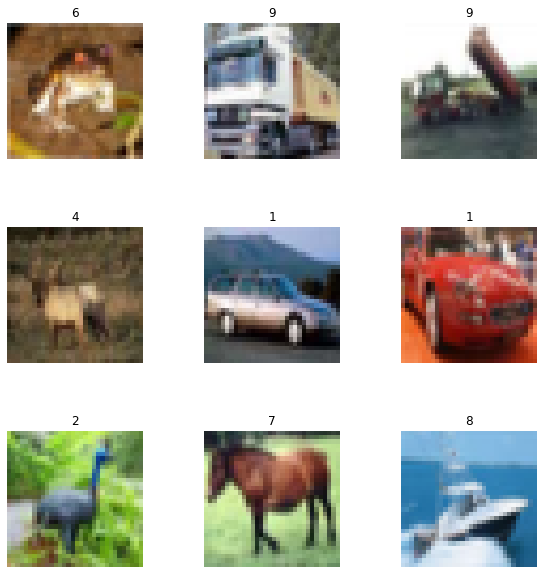

In [6]:
f, axes = plt.subplots(3, 3, figsize=(10,10))
axs = axes.ravel()

for i in range(9):
    example = X[i]
    R = example[0:1024].reshape(32,32)/255.0
    G = example[1024:2048].reshape(32,32)/255.0
    B = example[2048:].reshape(32,32)/255.0

    img = np.dstack((R,G,B))
    axs[i].imshow(img, interpolation='nearest')
    axs[i].set_title(y[i])
    axs[i].axis('off')

# show the figure
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [7]:
def display(X, index):
    example = X[i]
    R = example[0:1024].reshape(32,32)/255.0
    G = example[1024:2048].reshape(32,32)/255.0
    B = example[2048:].reshape(32,32)/255.0

    img = np.dstack((R,G,B))
    plt.imshow(img, interpolation='nearest')
    plt.title(y[i])
    plt.axis('off')
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(multi_class='multinomial')

param_grid = [{'penalty': ['l1'], 'solver':['saga'], 'C': [0.25, 0.5, 0.75]},
              {'penalty': ['l2'], 'solver':['lbfgs'], 'C': [0.25, 0.5, 0.75]}
             ]

log_reg_grid = GridSearchCV(log_reg, param_grid, cv=4, verbose=2)
log_reg_grid.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] C=0.25, penalty=l1, solver=saga .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.6min remaining:    0.0s


[CV] .................. C=0.25, penalty=l1, solver=saga, total= 3.6min
[CV] C=0.25, penalty=l1, solver=saga .................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.25, penalty=l1, solver=saga, total= 3.6min
[CV] C=0.25, penalty=l1, solver=saga .................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.25, penalty=l1, solver=saga, total= 3.8min
[CV] C=0.25, penalty=l1, solver=saga .................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.25, penalty=l1, solver=saga, total= 3.6min
[CV] C=0.5, penalty=l1, solver=saga ..................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.5, penalty=l1, solver=saga, total= 3.5min
[CV] C=0.5, penalty=l1, solver=saga ..................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.5, penalty=l1, solver=saga, total= 3.4min
[CV] C=0.5, penalty=l1, solver=saga ..................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.5, penalty=l1, solver=saga, total= 3.7min
[CV] C=0.5, penalty=l1, solver=saga ..................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.5, penalty=l1, solver=saga, total= 3.6min
[CV] C=0.75, penalty=l1, solver=saga .................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.75, penalty=l1, solver=saga, total= 3.5min
[CV] C=0.75, penalty=l1, solver=saga .................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.75, penalty=l1, solver=saga, total= 3.6min
[CV] C=0.75, penalty=l1, solver=saga .................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.75, penalty=l1, solver=saga, total= 3.7min
[CV] C=0.75, penalty=l1, solver=saga .................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.75, penalty=l1, solver=saga, total= 3.5min
[CV] C=0.25, penalty=l2, solver=lbfgs ................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=0.25, penalty=l2, solver=lbfgs, total=  11.6s
[CV] C=0.25, penalty=l2, solver=lbfgs ................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=0.25, penalty=l2, solver=lbfgs, total=  12.7s
[CV] C=0.25, penalty=l2, solver=lbfgs ................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=0.25, penalty=l2, solver=lbfgs, total=  11.2s
[CV] C=0.25, penalty=l2, solver=lbfgs ................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=0.25, penalty=l2, solver=lbfgs, total=  10.5s
[CV] C=0.5, penalty=l2, solver=lbfgs .................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=0.5, penalty=l2, solver=lbfgs, total=  11.2s
[CV] C=0.5, penalty=l2, solver=lbfgs .................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=0.5, penalty=l2, solver=lbfgs, total=  10.4s
[CV] C=0.5, penalty=l2, solver=lbfgs .................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=0.5, penalty=l2, solver=lbfgs, total=  11.2s
[CV] C=0.5, penalty=l2, solver=lbfgs .................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=0.5, penalty=l2, solver=lbfgs, total=  11.2s
[CV] C=0.75, penalty=l2, solver=lbfgs ................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=0.75, penalty=l2, solver=lbfgs, total=  11.6s
[CV] C=0.75, penalty=l2, solver=lbfgs ................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=0.75, penalty=l2, solver=lbfgs, total=  12.3s
[CV] C=0.75, penalty=l2, solver=lbfgs ................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=0.75, penalty=l2, solver=lbfgs, total=  12.8s
[CV] C=0.75, penalty=l2, solver=lbfgs ................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 45.3min finished


[CV] ................. C=0.75, penalty=l2, solver=lbfgs, total=  11.0s


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=4, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid=[{'C': [0.25, 0.5, 0.75], 'penalty': ['l1'],
                          'solver': ['saga']},
                         {'C': [0.25, 0.5, 0.75], 'penalty': ['l2'],
                          'solver': ['lbfgs']}],
             verbose=2)

In [10]:
log_reg_grid.best_params_

{'C': 0.75, 'penalty': 'l2', 'solver': 'lbfgs'}

In [14]:
from sklearn.model_selection import cross_val_score

def display_scores(model, X, y, cv=4):
    scores = cross_val_score(model, X, y, n_jobs=-1, scoring='accuracy', cv=cv)
    print(str(model.__class__.__name__) + '; mean: {:.4f} w std ({:.4f})'.format(scores.mean(), scores.std()))
    return scores 

In [15]:
# cross_val_score(log_reg_grid.best_estimator_, X_train, y_train, n_jobs=-1, cv=5)
display_scores(log_reg_grid, X_train, y_train)

GridSearchCV; mean: 0.3793 w std (0.0044)


array([0.3816    , 0.37493333, 0.3752    , 0.38533333])

In [16]:
from sklearn.metrics import log_loss

#train_error
train_preds = log_reg_grid.best_estimator_.predict_proba(X_train)
loss = log_loss(y_train, train_preds)
print('train error: ', loss)

#test_error
test_preds = log_reg_grid.best_estimator_.predict_proba(X_test)
loss = log_loss(y_test, test_preds)
print('test error: ', loss)

train error:  1.6033254361909732
test error:  1.7826759150238274


### Problem 2

In [17]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [18]:
X, y = mnist['data'], mnist['target']

In [19]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

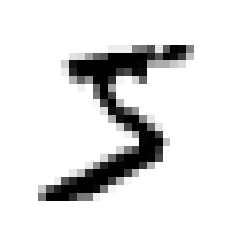

In [21]:
plot_digit(X[0])

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(multi_class='multinomial')

param_grid = [{'penalty': ['l1'], 'solver':['saga'], 'C': [0.25, 0.5, 0.75]},
              {'penalty': ['l2'], 'solver':['lbfgs'], 'C': [0.25, 0.5, 0.75]}
             ]
lr_gridsearch = GridSearchCV(log_reg, param_grid, cv=4, n_jobs=-1, verbose=2)
lr_gridsearch.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed: 15.1min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 15.1min finished
/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=4, estimator=LogisticRegression(multi_class='multinomial'),
             n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75], 'penalty': ['l1'],
                          'solver': ['saga']},
                         {'C': [0.25, 0.5, 0.75], 'penalty': ['l2'],
                          'solver': ['lbfgs']}],
             verbose=2)

In [23]:
lr_gridsearch.best_params_

{'C': 0.75, 'penalty': 'l1', 'solver': 'saga'}

In [24]:
for mean_score, params in zip(lr_gridsearch.cv_results_["mean_test_score"], lr_gridsearch.cv_results_["params"]):
    print(mean_score, params)

0.9182999999999999 {'C': 0.25, 'penalty': 'l1', 'solver': 'saga'}
0.9182166666666667 {'C': 0.5, 'penalty': 'l1', 'solver': 'saga'}
0.9183166666666667 {'C': 0.75, 'penalty': 'l1', 'solver': 'saga'}
0.9181333333333334 {'C': 0.25, 'penalty': 'l2', 'solver': 'lbfgs'}
0.9182666666666667 {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
0.9179999999999999 {'C': 0.75, 'penalty': 'l2', 'solver': 'lbfgs'}


In [25]:
# cross_val_score(lr_gridsearch.best_estimator_, X_train, y_train, n_jobs=-1, cv=5)

In [26]:
display_scores(lr_gridsearch.best_estimator_, X_train, y_train)

LogisticRegression; mean: 0.9183 w std (0.0006)


array([0.91893333, 0.91873333, 0.91813333, 0.91746667])

In [27]:
from sklearn.metrics import log_loss

#train_error
train_preds = lr_gridsearch.best_estimator_.predict_proba(X_train)
loss = log_loss(y_train, train_preds)
print('train error: ', loss)

#test_error
test_preds = lr_gridsearch.best_estimator_.predict_proba(X_test)
loss = log_loss(y_test, test_preds)
print('test error: ', loss)

train error:  0.22225452645541355
test error:  0.30854628505299314


In [28]:
#choose l1 best and redo above cell here!!!!

In [29]:
lr_gridsearch.best_estimator_.coef_.shape

(10, 784)

In [30]:
coefs = lr_gridsearch.best_estimator_.coef_

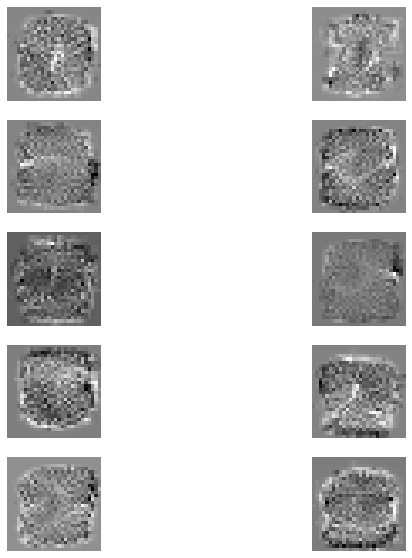

In [31]:
f, axs = plt.subplots(5, 2, figsize=(10,10))
axs = axs.ravel()

for j in range(coefs.shape[0]):
    cur_coef = coefs[j, :]
    reshaped = cur_coef.reshape(28,28)
    axs[j].imshow(reshaped, cmap=mpl.cm.binary, interpolation='nearest')
    axs[j].axis('off')
plt.show()
    

### Problem 3

#### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(max_features='sqrt', random_state=42)

param_grid = {
        'n_estimators': [100, 500],
        'max_depth': [4, 8],
#         'bootstrap': [False, True],
        'min_samples_leaf': [5, 10, 20],
        'min_samples_split' : [5, 10, 20] 
    }


rf_gridsearch = RandomizedSearchCV(rf_clf, param_grid, n_iter=100, cv=4, random_state=42,
                       scoring='accuracy', n_jobs=-1, verbose=2)

rf_gridsearch.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 36.4min finished


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(max_features='sqrt',
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [4, 8],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [100, 500]},
                   random_state=42, scoring='accuracy', verbose=2)

In [33]:
print('best hyper params: ', rf_gridsearch.best_params_)

best hyper params:  {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 8}


In [34]:
display_scores(rf_gridsearch.best_estimator_, X_train, y_train)

RandomForestClassifier; mean: 0.9266 w std (0.0002)


array([0.92633333, 0.92686667, 0.92653333, 0.9266    ])

In [35]:
from sklearn.metrics import accuracy_score

y_pred = rf_gridsearch.predict(X_test)
y_pred_log = lr_gridsearch.predict(X_test)
print('random forest classifier accuracy: {}, log reg classifier accuracy: {}'.format(accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_log)))

random forest classifier accuracy: 0.927, log reg classifier accuracy: 0.9208


#### Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_features='sqrt', random_state=42)

param_grid = {
        'subsample' : [0.5, 0.8],
        'n_estimators': [100, 500],
        'max_depth': [4, 8],
        'min_samples_leaf': [5, 10, 20],
        'min_samples_split' : [5, 10, 20]
}

gb_gridsearch = RandomizedSearchCV(gb_clf, param_grid, cv=4, n_iter=100, random_state=42, scoring='accuracy', n_jobs=-1, verbose=2)

gb_gridsearch.fit(X_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 263.3min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 715.1min finished


RandomizedSearchCV(cv=4,
                   estimator=GradientBoostingClassifier(max_features='sqrt',
                                                        random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [4, 8],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [100, 500],
                                        'subsample': [0.5, 0.8]},
                   random_state=42, scoring='accuracy', verbose=2)

In [37]:
print('best hyper params: ', gb_gridsearch.best_params_)

best hyper params:  {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_depth': 8}


In [39]:
y_pred_gb = gb_gridsearch.predict(X_test)
print('gradient boosting classifier accuracy: {}'.format(accuracy_score(y_test, y_pred_gb)))

gradient boosting classifier accuracy: 0.9798


### Problem 4

In [40]:
X_cifar, y_cifar = cifar_10_small['data'], cifar_10_small['target']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_cifar, y_cifar, test_size=0.25, random_state=42)

Random Forest

In [42]:
rf_clf = RandomForestClassifier(max_features='sqrt', random_state=42)

param_grid = {
        'n_estimators': [100, 500],
        'max_depth': [4, 8],
#         'bootstrap': [False, True],
        'min_samples_leaf': [5, 10, 20],
        'min_samples_split' : [5, 10, 20] 
    }


rf_gridsearch = RandomizedSearchCV(rf_clf, param_grid, n_iter=100, cv=4, random_state=42,
                       scoring='accuracy', n_jobs=-1, verbose=2)

rf_gridsearch.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 26.9min finished


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(max_features='sqrt',
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [4, 8],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [100, 500]},
                   random_state=42, scoring='accuracy', verbose=2)

In [43]:
print('best params: ', rf_gridsearch.best_params_)

best params:  {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 8}


In [45]:
y_pred = rf_gridsearch.predict(X_test)
print('random forest classifier accuracy: {}'.format(accuracy_score(y_test, y_pred)))

random forest classifier accuracy: 0.3932


Gradient Boosting

In [47]:
gb_clf = GradientBoostingClassifier(max_features='sqrt', random_state=42)

param_grid = {
        'subsample' : [0.8],
        'n_estimators': [500],
        'max_depth': [4, 8],
        'min_samples_leaf': [5, 10, 20],
        'min_samples_split' : [5, 10, 20]
}

gb_gridsearch = RandomizedSearchCV(gb_clf, param_grid, cv=3, n_iter=100, random_state=42, scoring='accuracy', n_jobs=-1, verbose=2)

gb_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 63.5min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 155.5min finished


RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingClassifier(max_features='sqrt',
                                                        random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [4, 8],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [500],
                                        'subsample': [0.8]},
                   random_state=42, scoring='accuracy', verbose=2)

In [48]:
print('best params: ', gb_gridsearch.best_params_)

best params:  {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_depth': 8}


In [50]:
y_pred = gb_gridsearch.predict(X_test)
print('gradient boosting classifier accuracy: {}'.format(accuracy_score(y_test, y_pred)))

gradient boosting classifier accuracy: 0.5258


For both of the datasets, gradient boosting performed better than random forest (which was better than logistic regression on MINST)